## Predicting Diabetes
This dataset originally comes from the National Institute of Diabetes and Digestive and Kidney Diseases. The goal is to predict, based on diagnostic measures, whether or not a patient has diabetes.

In [47]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

Observaciones:
- La variable objetivo es outcome, pues es la que indica si el paciente tiene  diabetes o no.
- Pregnancies puede considerarse como variable categórica y numérica.
- No hay valores nulos en el set de datos.

### Analysis of univariate variables
*Se considerará la variable 'pregnancy' como numérica, así que no existen variables categóricas en este análisis

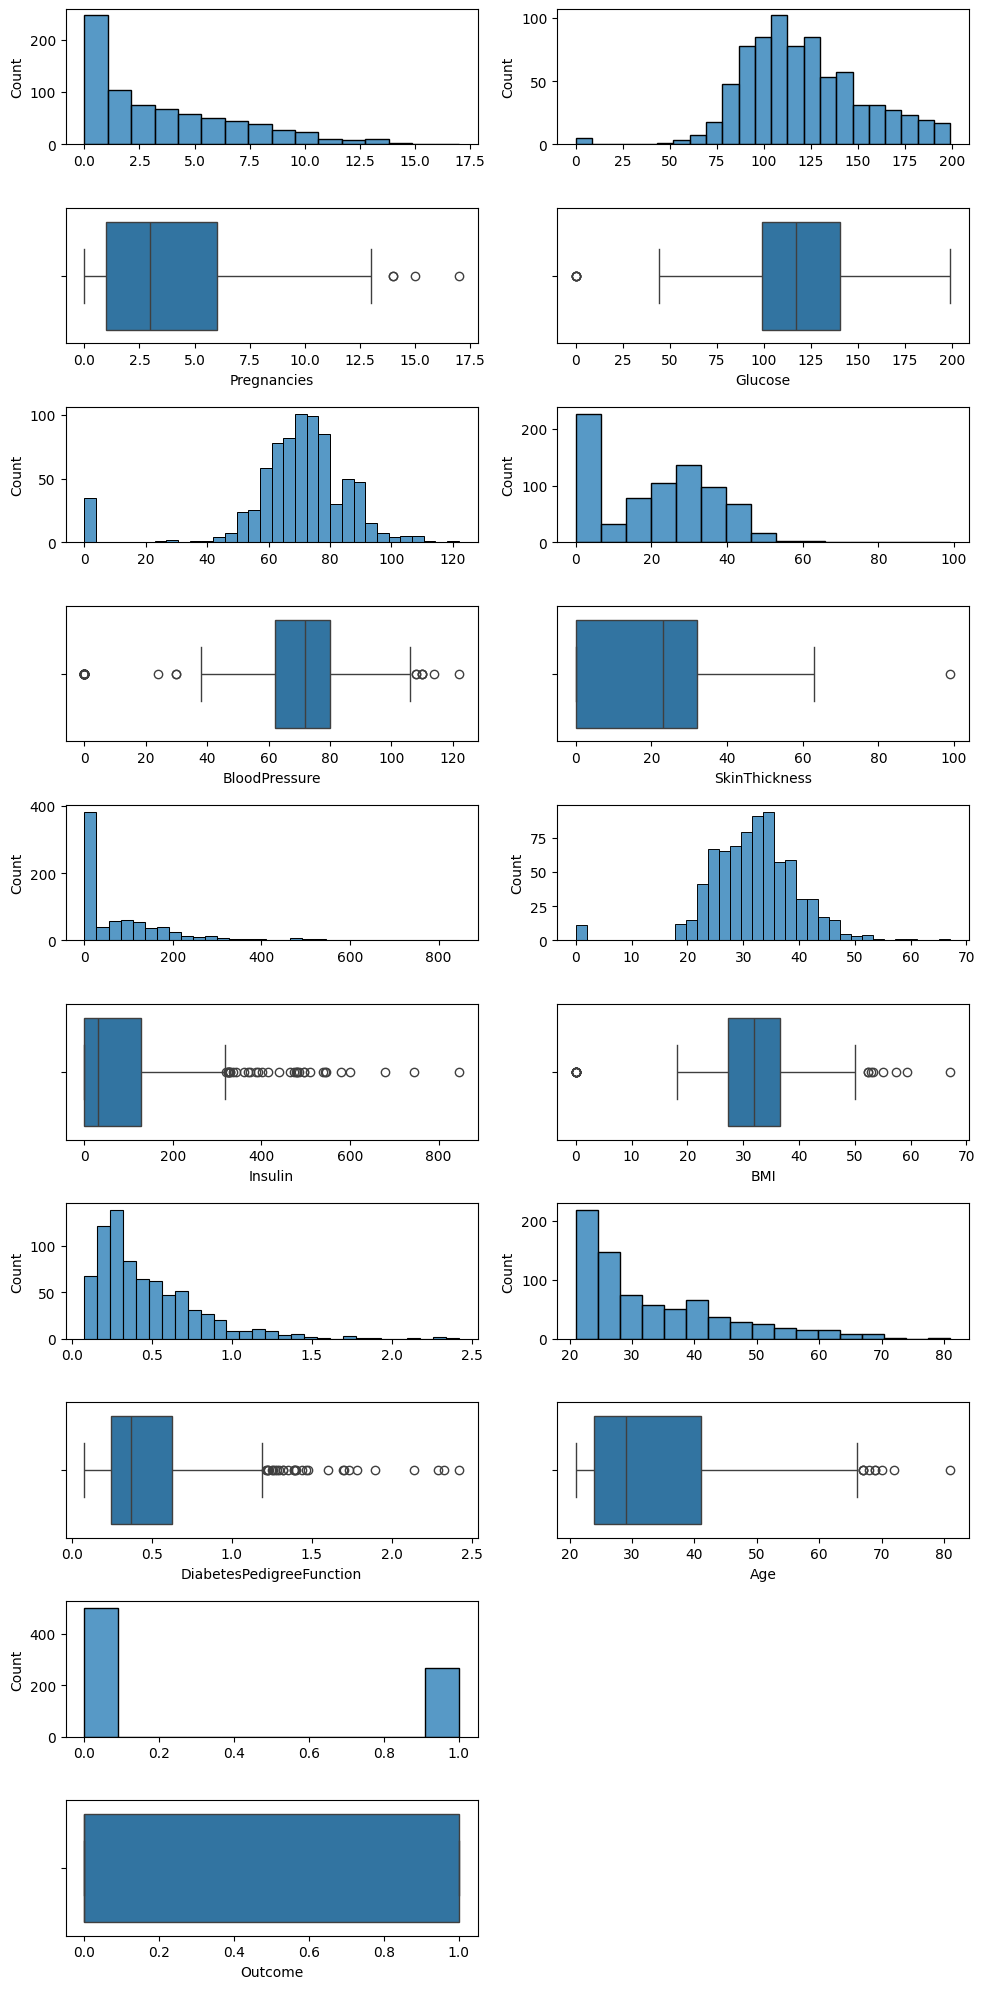

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axis = plt.subplots(10,2, figsize = (10, 20))

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = data, x = "Pregnancies").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "Pregnancies")
sns.histplot(ax = axis[0, 1], data = data, x = "Glucose").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "Glucose")
sns.histplot(ax = axis[2, 0], data = data, x = "BloodPressure").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = data, x = "BloodPressure")
sns.histplot(ax = axis[2, 1], data = data, x = "SkinThickness").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = data, x = "SkinThickness")
sns.histplot(ax = axis[4, 0], data = data, x = "Insulin").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = data, x = "Insulin")
sns.histplot(ax = axis[4, 1], data = data, x = "BMI").set(xlabel = None)
sns.boxplot(ax = axis[5, 1], data = data, x = "BMI")
sns.histplot(ax = axis[6, 0], data = data, x = "DiabetesPedigreeFunction").set(xlabel = None)
sns.boxplot(ax = axis[7, 0], data = data, x = "DiabetesPedigreeFunction")
sns.histplot(ax = axis[6, 1], data = data, x = "Age").set(xlabel = None)
sns.boxplot(ax = axis[7, 1], data = data, x = "Age")
sns.histplot(ax = axis[8, 0], data = data, x = "Outcome").set(xlabel = None)
sns.boxplot(ax = axis[9, 0], data = data, x = "Outcome")

# Ajustar el layout
plt.tight_layout()
fig.delaxes(axis[9, 1])
fig.delaxes(axis[8, 1])

# Mostrar el plot
plt.show()

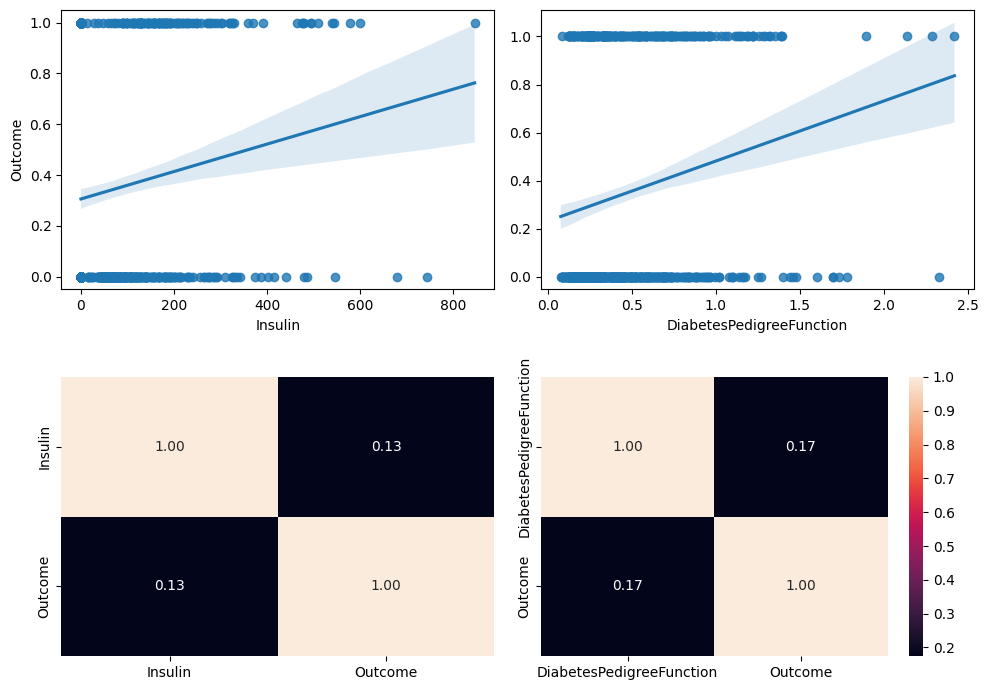

In [50]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = data, x = "Insulin", y = "Outcome")
sns.heatmap(data[["Insulin", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data, x = "DiabetesPedigreeFunction", y = "Outcome").set(ylabel=None)
sns.heatmap(data[["DiabetesPedigreeFunction", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

De los gráficos anteriores se obtuvo que tanto los niveles de insulina como la Función de Pedigree de Diabetes son factores que podrían indicar si una persona tiene diabetes o no. Se confirmará si son las variables más determinantes en el heatmap.

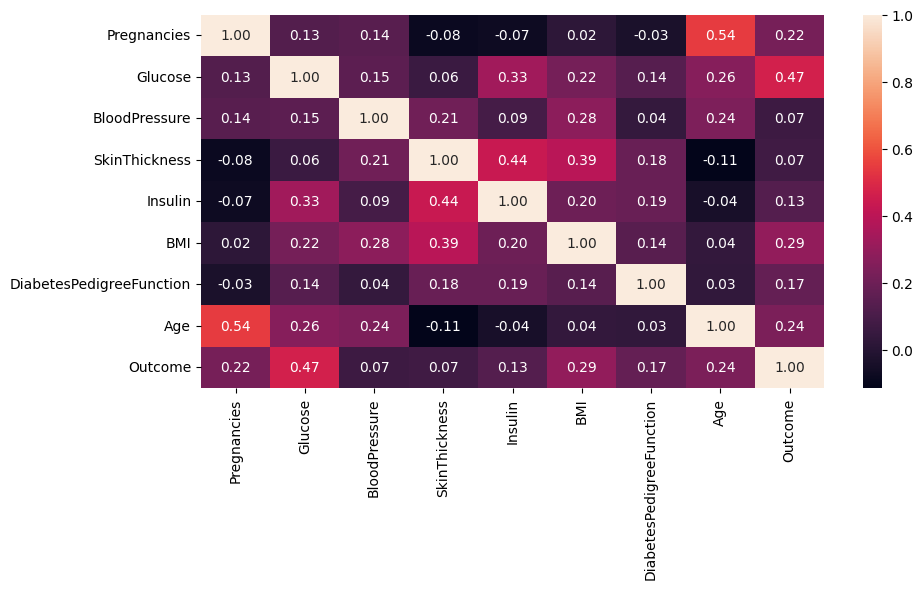

In [51]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction","Age","Outcome"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

Del heatmap obtenemos que:
- La relación entre la glucosa y outcome es la más fuerte, por lo que se considera la más influyente en este caso.
- La relación más débil se encuentra entre la presión sanguínea y el grosor de la piel, ambos con 0.7, se debe evaluar más a fondo para saber qué tan influyentes son.
- BMI, Edad y Embarazos sobrepasan los 20 puntos de correlación, así que se consideran variables fuertes.

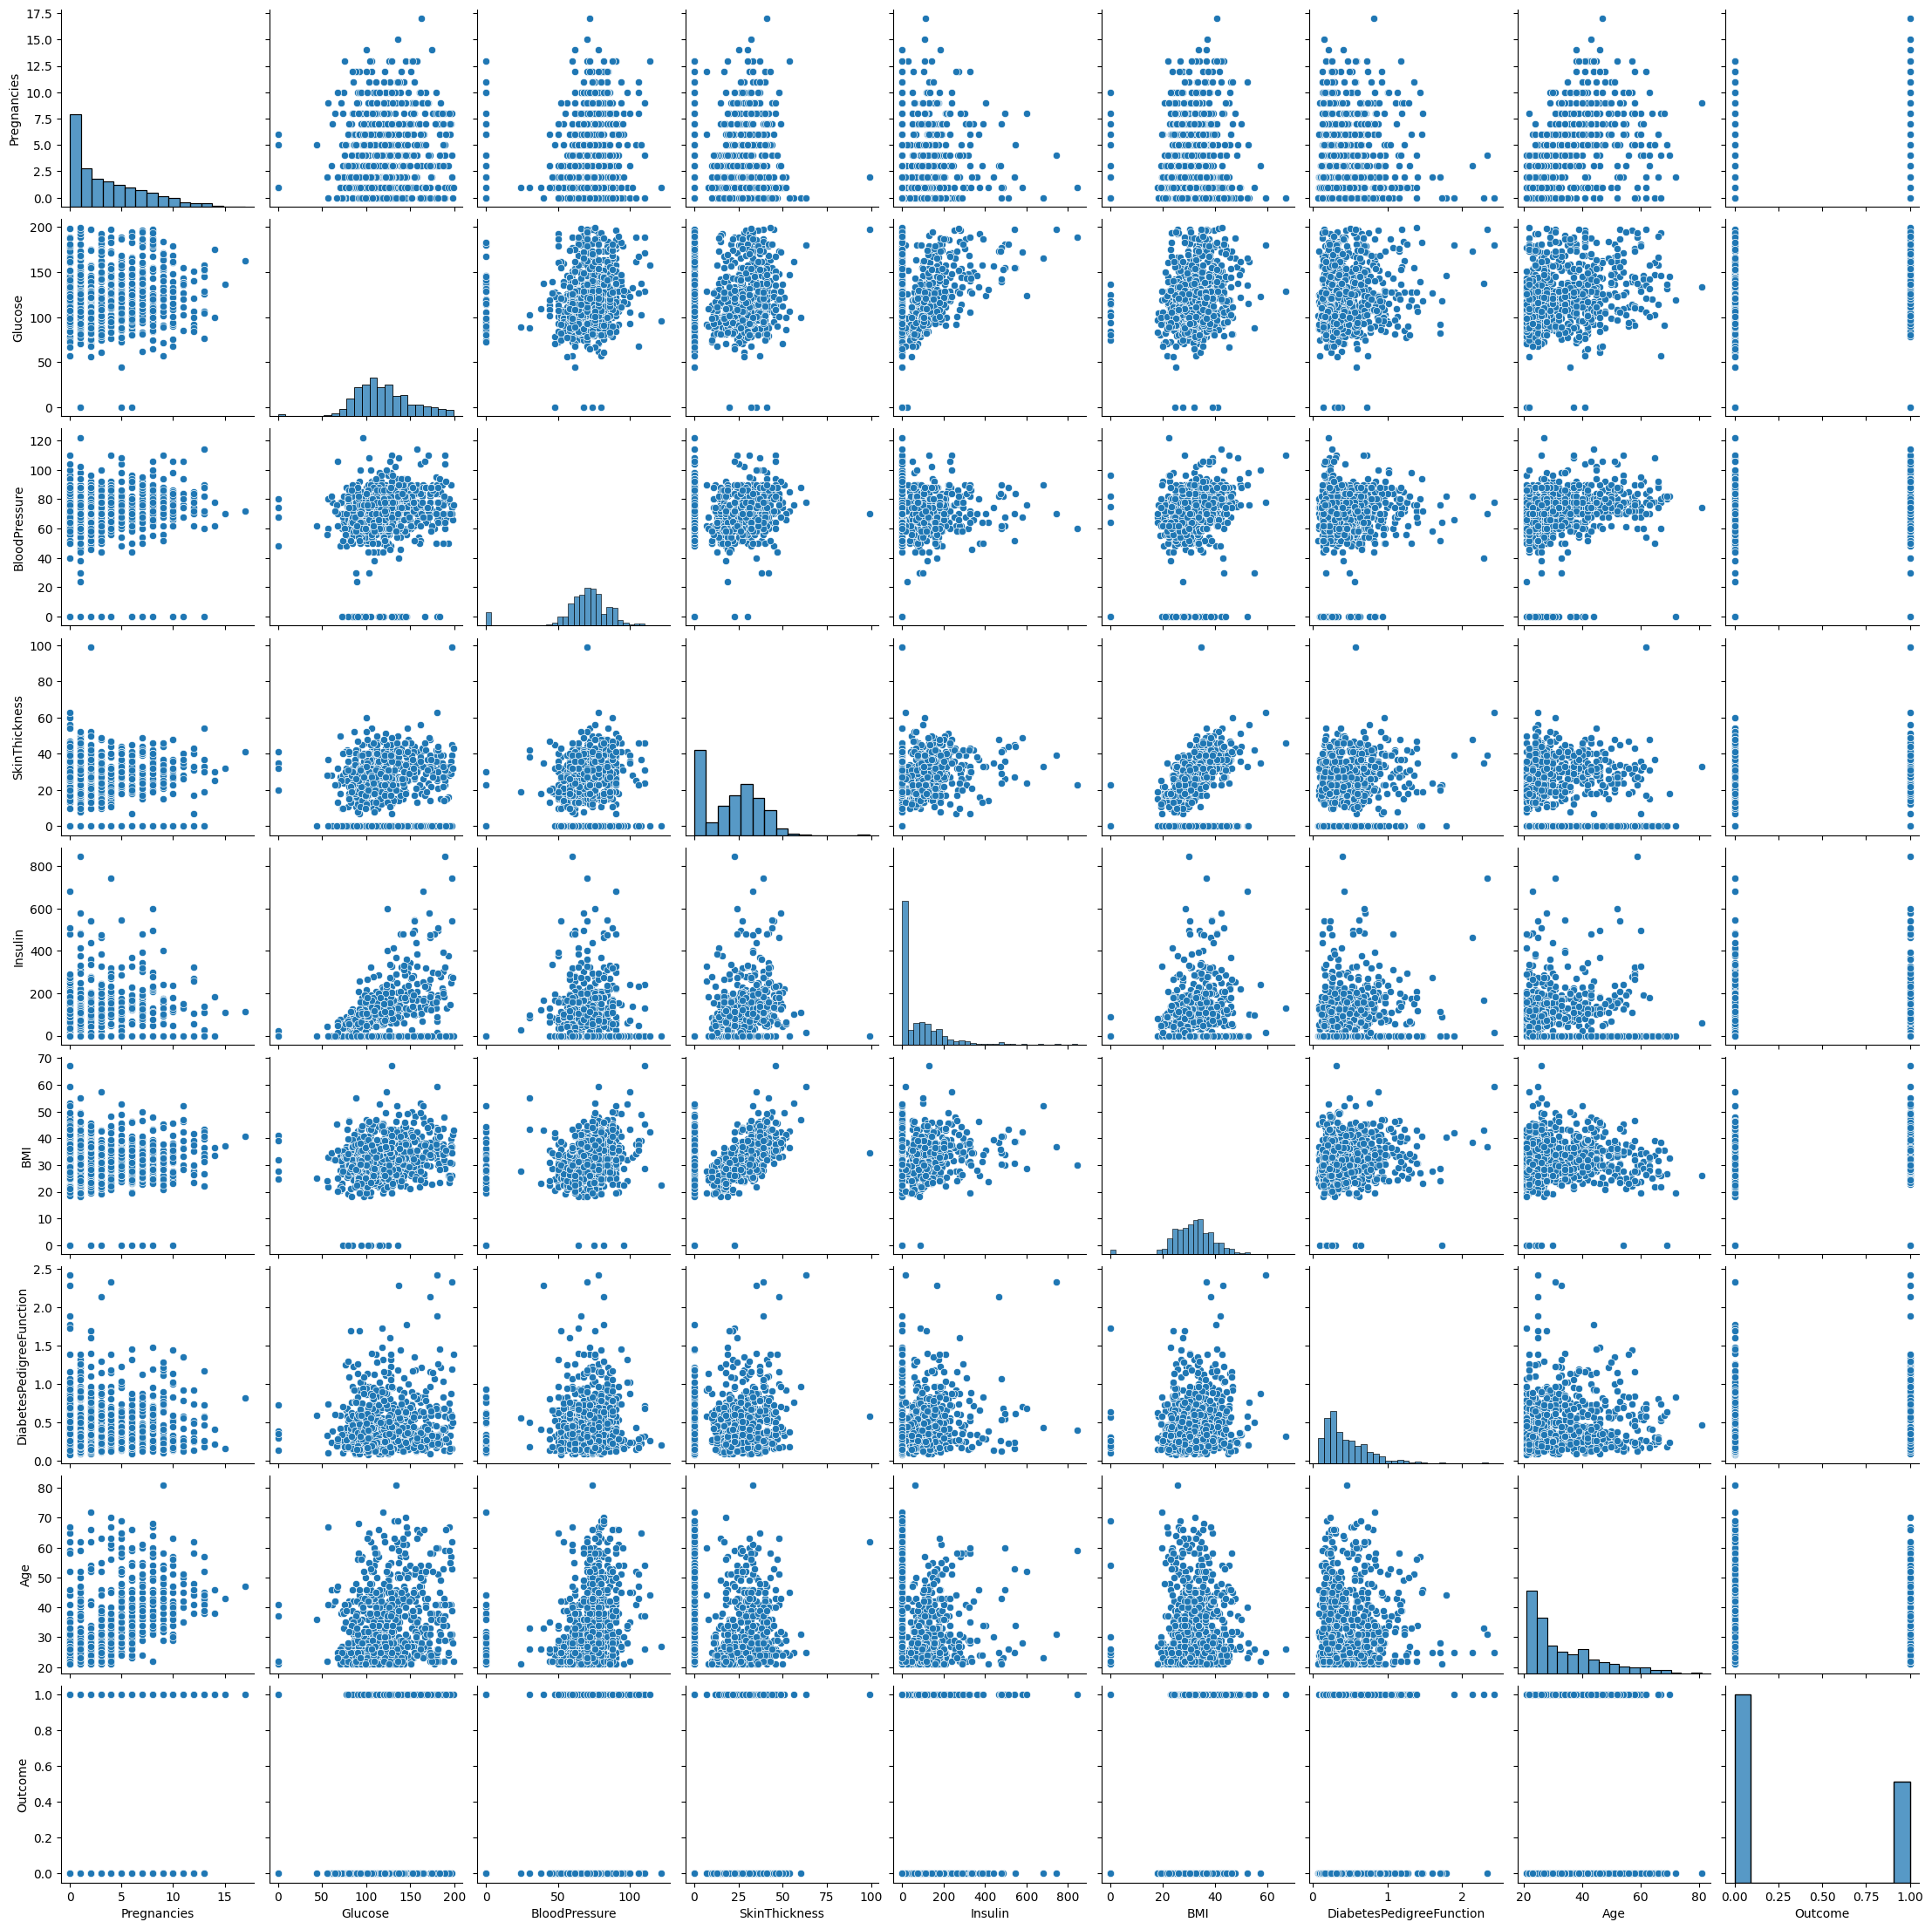

In [52]:
sns.pairplot(data = data)

In [53]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


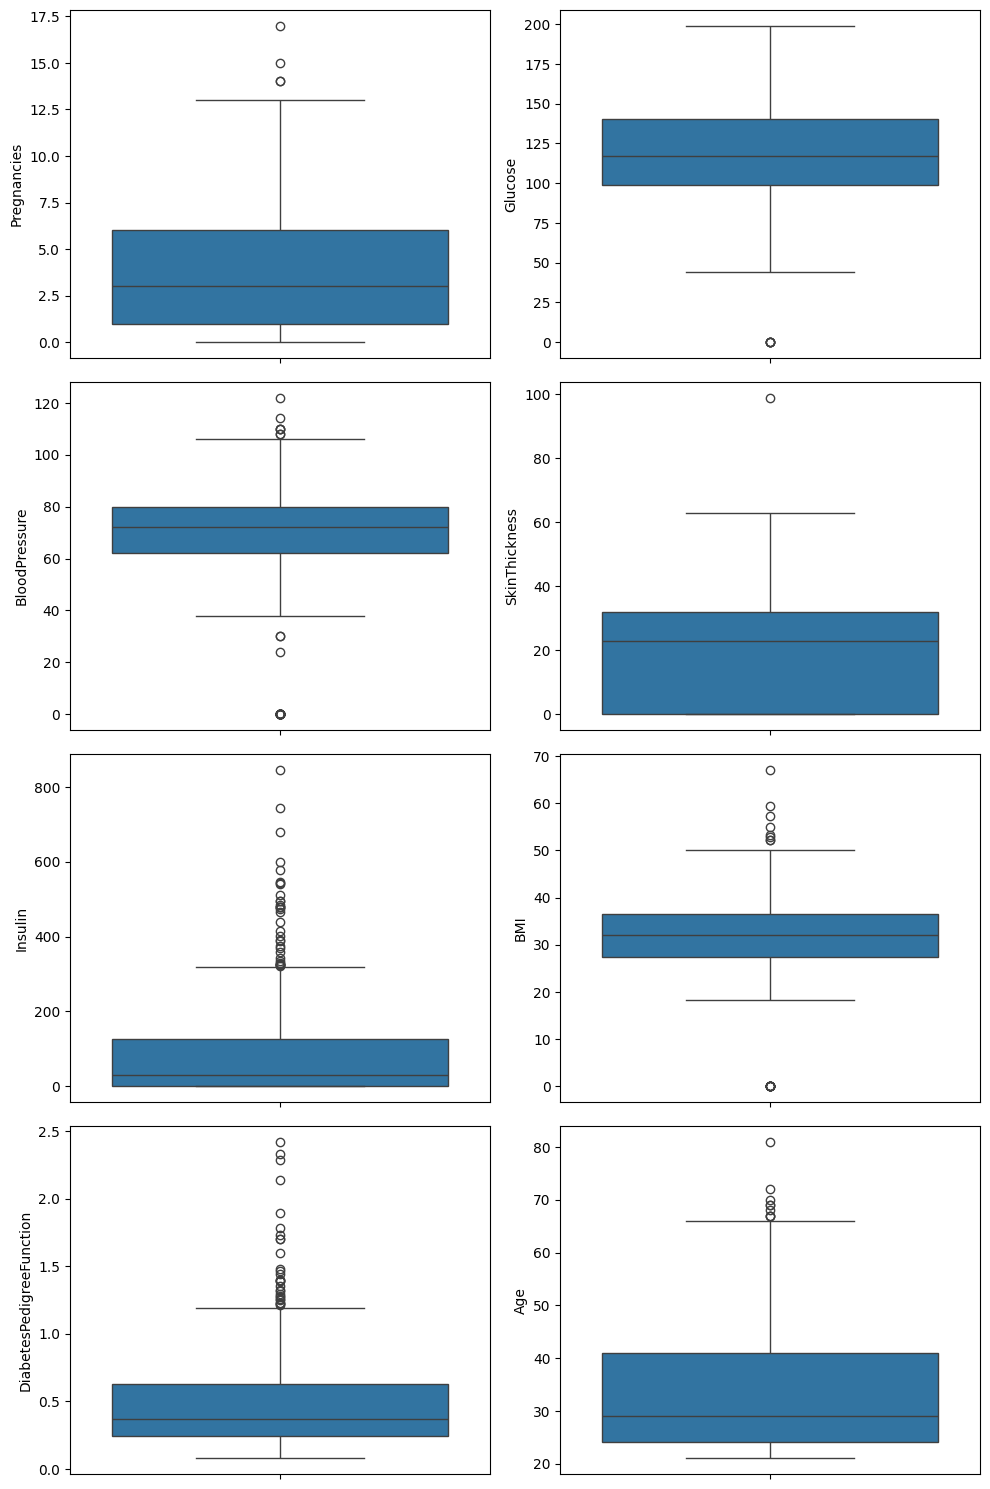

In [54]:
fig, axis = plt.subplots(4,2, figsize = (10, 15))

sns.boxplot(ax = axis[0,0], data = data, y = "Pregnancies")
sns.boxplot(ax = axis[0,1], data = data, y = "Glucose")
sns.boxplot(ax = axis[1,0], data = data, y = "BloodPressure")
sns.boxplot(ax = axis[1,1], data = data, y = "SkinThickness")
sns.boxplot(ax = axis[2,0], data = data, y = "Insulin")
sns.boxplot(ax = axis[2,1], data = data, y = "BMI")
sns.boxplot(ax = axis[3,0], data = data, y = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[3,1], data = data, y = "Age")

plt.tight_layout()
plt.show()

- En glucosa, BMI y blood pressure hay registros que están en 0.
- Es necesario hacer una evaluación a los valores de DiabetesPedigreeFunction, Insulin y BMI, pues tienen valores muy fuera de rango


In [55]:
pregnancy_stats = data["Pregnancies"].describe()
pregnancy_iqr = pregnancy_stats["75%"] - pregnancy_stats["25%"]
upper_limit = pregnancy_stats["75%"] + 1.5 * pregnancy_iqr
lower_limit = pregnancy_stats["25%"] - 1.5 * pregnancy_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(pregnancy_iqr, 2)}")

The upper and lower limits for finding outliers are 13.5 and -6.5, with an interquartile range of 5.0


In [56]:
print(data[data["Pregnancies"] > 13.5])

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
88            15      136             70             32      110  37.1   
159           17      163             72             41      114  40.9   
298           14      100             78             25      184  36.6   
455           14      175             62             30        0  33.6   

     DiabetesPedigreeFunction  Age  Outcome  
88                      0.153   43        1  
159                     0.817   47        1  
298                     0.412   46        1  
455                     0.212   38        1  


In [57]:
Glucose_stats = data["Glucose"].describe()
Glucose_iqr = Glucose_stats["75%"] - Glucose_stats["25%"]
upper_limit = Glucose_stats["75%"] + 1.5 * Glucose_iqr
lower_limit = Glucose_stats["25%"] - 1.5 * Glucose_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(Glucose_iqr, 2)}")

The upper and lower limits for finding outliers are 202.12 and 37.12, with an interquartile range of 41.25


In [58]:
print(f"Upper: \n {data[data['Glucose'] > 202.12]} ")
print(f"Lower:\n {data[data['Glucose'] < 37.12]} ")

Upper: 
 Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: [] 
Lower:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80             32        0  41.0   
502            6        0             68             41        0  39.0   

     DiabetesPedigreeFunction  Age  Outcome  
75                      0.140   22        0  
182                     0.299   21        0  
342                     0.389   22        0  
349                     0.346   37        1  
502                     0.727   41        1   


In [59]:
data = data[data['Glucose'] > 37.12]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               763 non-null    int64  
 1   Glucose                   763 non-null    int64  
 2   BloodPressure             763 non-null    int64  
 3   SkinThickness             763 non-null    int64  
 4   Insulin                   763 non-null    int64  
 5   BMI                       763 non-null    float64
 6   DiabetesPedigreeFunction  763 non-null    float64
 7   Age                       763 non-null    int64  
 8   Outcome                   763 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 59.6 KB


In [60]:
BloodPressure_stats = data["BloodPressure"].describe()
BloodPressure_iqr = BloodPressure_stats["75%"] - BloodPressure_stats["25%"]
upper_limit = BloodPressure_stats["75%"] + 1.5 * BloodPressure_iqr
lower_limit = BloodPressure_stats["25%"] - 1.5 * BloodPressure_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(BloodPressure_iqr, 2)}")

The upper and lower limits for finding outliers are 107.0 and 35.0, with an interquartile range of 18.0


In [61]:
print(f"Upper: \n {data[data['BloodPressure'] > 107]} ")
print(f"Lower:\n {data[data['BloodPressure'] < 17]} ")

Upper: 
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
43             9      171            110             24      240  45.4   
84             5      137            108              0        0  48.8   
106            1       96            122              0        0  22.4   
177            0      129            110             46      130  67.1   
362            5      103            108             37        0  39.2   
549            4      189            110             31        0  28.5   
691           13      158            114              0        0  42.3   

     DiabetesPedigreeFunction  Age  Outcome  
43                      0.721   54        1  
84                      0.227   37        1  
106                     0.207   27        0  
177                     0.319   26        1  
362                     0.305   65        0  
549                     0.680   37        0  
691                     0.257   44        1   
Lower:
      Pregnancies  Glu

In [62]:
data.loc[data['BloodPressure'] < 17, 'BloodPressure'] = int(data['BloodPressure'].mean())
print(data["BloodPressure"].describe())

count    763.000000
mean      72.280472
std       12.119699
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64


In [63]:
print(data['SkinThickness'].describe())

count    763.000000
mean      20.477064
std       15.973171
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64


In [64]:
SkinThickness_stats = data["SkinThickness"].describe()
SkinThickness_iqr = SkinThickness_stats["75%"] - SkinThickness_stats["25%"]
upper_limit = SkinThickness_stats["75%"] + 1.5 * SkinThickness_iqr
lower_limit = SkinThickness_stats["25%"] - 1.5 * SkinThickness_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(SkinThickness_iqr, 2)}")


The upper and lower limits for finding outliers are 80.0 and -48.0, with an interquartile range of 32.0


In [65]:
print(f"Upper: \n {data[data['SkinThickness'] > 80]} ")
print(f"Lower:\n {data[data['SkinThickness'] < -48]} ")
print(f"0:\n {data[data['SkinThickness'] == 0]} ")


Upper: 
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
579            2      197             70             99        0  34.7   

     DiabetesPedigreeFunction  Age  Outcome  
579                     0.575   62        1   
Lower:
 Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: [] 
0:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2              8      183             64              0        0  23.3   
5              5      116             74              0        0  25.6   
7             10      115             69              0        0  35.3   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
..           ...      ...            ...            ...      ...   ...   
757            0      123             72              0        0  36.3   
75

In [66]:
data.loc[data['SkinThickness'] < 17, 'SkinThickness'] = int(data['SkinThickness'].mean())
print(data["SkinThickness"].describe())

count    763.000000
mean      26.973788
std        9.123207
min       17.000000
25%       20.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64


In [67]:
Insulin_stats = data["Insulin"].describe()
Insulin_iqr = Insulin_stats["75%"] - Insulin_stats["25%"]
upper_limit = Insulin_stats["75%"] + 1.5 * Insulin_iqr
lower_limit = Insulin_stats["25%"] - 1.5 * Insulin_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(Insulin_iqr, 2)}")


The upper and lower limits for finding outliers are 321.25 and -192.75, with an interquartile range of 128.5


In [68]:
print(f"Upper: \n {data[data['Insulin'] > 321.25]} ")
print(f"Lower:\n {data[data['Insulin'] < -192.75]} ")
print(f"0:\n {data[data['Insulin'] == 0]} ")

Upper: 
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
8              2      197             70             45      543  30.5   
13             1      189             60             23      846  30.1   
54             7      150             66             42      342  34.7   
111            8      155             62             26      495  34.0   
139            5      105             72             29      325  36.9   
153            1      153             82             42      485  40.6   
186            8      181             68             36      495  30.1   
220            0      177             60             29      478  34.6   
228            4      197             70             39      744  36.7   
231            6      134             80             37      370  46.2   
247            0      165             90             33      680  52.3   
248            9      124             70             33      402  35.4   
258            1      193    

In [69]:
data.loc[data['Insulin'] < 17, 'Insulin'] = int(data['Insulin'].mean())
print(data["Insulin"].describe())

count    763.000000
mean     119.342071
std       93.039938
min       18.000000
25%       80.000000
50%       80.000000
75%      128.500000
max      846.000000
Name: Insulin, dtype: float64


In [70]:
BMI_stats = data["BMI"].describe()
BMI_iqr = BMI_stats["75%"] - BMI_stats["25%"]
upper_limit = BMI_stats["75%"] + 1.5 * BMI_iqr
lower_limit = BMI_stats["25%"] - 1.5 * BMI_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(BMI_iqr, 2)}")


The upper and lower limits for finding outliers are 50.42 and 13.43, with an interquartile range of 9.25


In [71]:
print(f"Upper: \n {data[data['BMI'] > 50.42]} ")
print(f"Lower:\n {data[data['BMI'] < 13.43]} ")

Upper: 
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
120            0      162             76             56      100  53.2   
125            1       88             30             42       99  55.0   
177            0      129            110             46      130  67.1   
193           11      135             69             20       80  52.3   
247            0      165             90             33      680  52.3   
303            5      115             98             20       80  52.9   
445            0      180             78             63       80  59.4   
673            3      123            100             35      240  57.3   

     DiabetesPedigreeFunction  Age  Outcome  
120                     0.759   25        1  
125                     0.496   26        1  
177                     0.319   26        1  
193                     0.578   40        1  
247                     0.427   23        0  
303                     0.209   28        1  
44

In [72]:
data = data[data['BMI'] > 13.43]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 752 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               752 non-null    int64  
 1   Glucose                   752 non-null    int64  
 2   BloodPressure             752 non-null    int64  
 3   SkinThickness             752 non-null    int64  
 4   Insulin                   752 non-null    int64  
 5   BMI                       752 non-null    float64
 6   DiabetesPedigreeFunction  752 non-null    float64
 7   Age                       752 non-null    int64  
 8   Outcome                   752 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 58.8 KB


In [73]:
DiabetesPedigreeFunction_stats = data["DiabetesPedigreeFunction"].describe()
DiabetesPedigreeFunction_iqr = DiabetesPedigreeFunction_stats["75%"] - DiabetesPedigreeFunction_stats["25%"]
upper_limit = DiabetesPedigreeFunction_stats["75%"] + 1.5 * DiabetesPedigreeFunction_iqr
lower_limit = DiabetesPedigreeFunction_stats["25%"] - 1.5 * DiabetesPedigreeFunction_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(DiabetesPedigreeFunction_iqr, 2)}")


The upper and lower limits for finding outliers are 1.2 and -0.33, with an interquartile range of 0.38


In [74]:
print(f"Upper: \n {data[data['DiabetesPedigreeFunction'] > 1.2]} ")
print(f"Lower:\n {data[data['DiabetesPedigreeFunction'] < -0.33]} ")

Upper: 
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
12            10      139             80             20       80  27.1   
39             4      111             72             47      207  37.1   
45             0      180             66             39       80  42.0   
58             0      146             82             20       80  40.5   
100            1      163             72             20       80  39.0   
147            2      106             64             35      119  30.5   
187            1      128             98             41       58  32.0   
218            5       85             74             22       80  29.0   
228            4      197             70             39      744  36.7   
243            6      119             50             22      176  27.1   
245            9      184             85             20       80  30.0   
259           11      155    

In [75]:
Age_stats = data["Age"].describe()
Age_iqr = Age_stats["75%"] - Age_stats["25%"]
upper_limit = Age_stats["75%"] + 1.5 * Age_iqr
lower_limit = Age_stats["25%"] - 1.5 * Age_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(Age_iqr, 2)}")


The upper and lower limits for finding outliers are 66.5 and -1.5, with an interquartile range of 17.0


In [76]:
print(f"Upper: \n {data[data['Age'] > 66.5]} ")
print(f"Lower:\n {data[data['Age'] < -1.5]} ")
print(f"Lower:\n {data[data['Age'] == 0]} ")

Upper: 
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
123            5      132             80             20       80  26.8   
363            4      146             78             20       80  38.5   
453            2      119             69             20       80  19.6   
459            9      134             74             33       60  25.9   
489            8      194             80             20       80  26.1   
537            0       57             60             20       80  21.7   
666            4      145             82             18       80  32.5   
674            8       91             82             20       80  35.6   

     DiabetesPedigreeFunction  Age  Outcome  
123                     0.186   69        0  
363                     0.520   67        1  
453                     0.832   72        0  
459                     0.460   81        0  
489                     0.551   67        0  
537                     0.735   67        0  
66

In [77]:
data.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

num_variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = data.index, columns = num_variables)
total_data_scal.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.219512,0.074879,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.146341,0.074879,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.036585,0.074879,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.073171,0.091787,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.219512,0.181159,0.509202,0.943638,0.200000,1.0


In [79]:
from sklearn.model_selection import train_test_split

X = total_data_scal.drop("Outcome", axis = 1)
y = total_data_scal["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
599,0.058824,0.419355,0.142857,0.012195,0.123188,0.100204,0.140478,0.083333
136,0.000000,0.361290,0.469388,0.109756,0.038647,0.257669,0.221605,0.000000
45,0.000000,0.877419,0.428571,0.268293,0.074879,0.486708,0.774979,0.066667
73,0.235294,0.548387,0.632653,0.036585,0.304348,0.345603,0.065329,0.033333
508,0.117647,0.258065,0.265306,0.073171,0.070048,0.249489,0.380017,0.000000


In [80]:
X_train["Outcome"] = y_train.values
X_test["Outcome"] = y_test.values
X_train.to_csv("/workspaces/predictingDiabetes/data/processed/diabetes_train.csv", index = False)
X_test.to_csv("/workspaces/predictingDiabetes/data/processed/diabetes_test.csv", index = False)

## Model

In [81]:
train_data = pd.read_csv("/workspaces/predictingDiabetes/data/processed/diabetes_train.csv")
test_data = pd.read_csv("/workspaces/predictingDiabetes/data/processed/diabetes_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.058824,0.419355,0.142857,0.012195,0.123188,0.100204,0.140478,0.083333,0.0
1,0.000000,0.361290,0.469388,0.109756,0.038647,0.257669,0.221605,0.000000,0.0
2,0.000000,0.877419,0.428571,0.268293,0.074879,0.486708,0.774979,0.066667,1.0
3,0.235294,0.548387,0.632653,0.036585,0.304348,0.345603,0.065329,0.033333,0.0
4,0.117647,0.258065,0.265306,0.073171,0.070048,0.249489,0.380017,0.000000,0.0


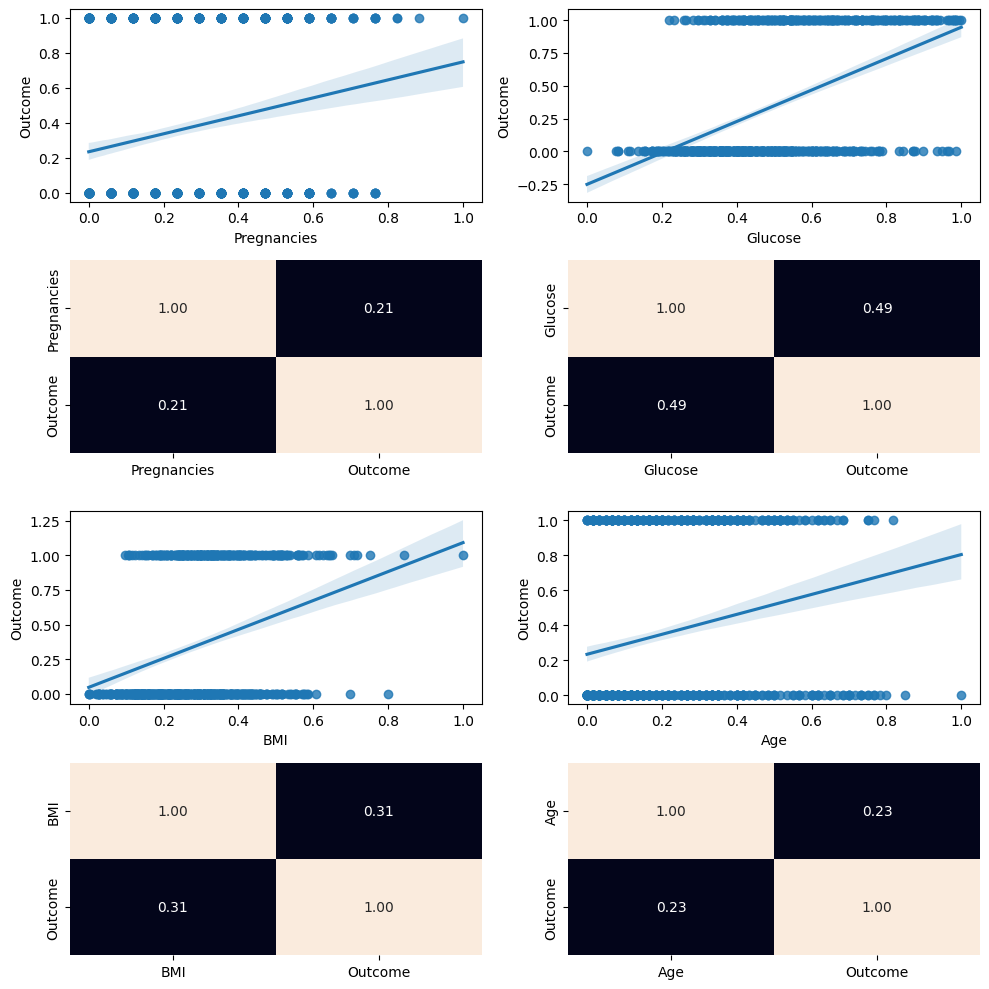

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 10))
total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0,0], data = total_data, x = "Pregnancies", y = "Outcome")
sns.heatmap(total_data[["Pregnancies", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0], cbar = False)
sns.regplot(ax = axis[0,1], data = total_data, x = "Glucose", y = "Outcome")
sns.heatmap(total_data[["Glucose", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[1,1], cbar = False)
sns.regplot(ax = axis[2,0], data = total_data, x = "BMI", y = "Outcome")
sns.heatmap(total_data[["BMI", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[3,0], cbar = False)
sns.regplot(ax = axis[2,1], data = total_data, x = "Age", y = "Outcome")
sns.heatmap(total_data[["Age", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[3,1], cbar = False)

plt.tight_layout()

plt.show()

In [83]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

#### Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier(random_state = 42)
modelDT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Creamos el modelo con los valores default para un modelo base y poder compararlo con la optimización

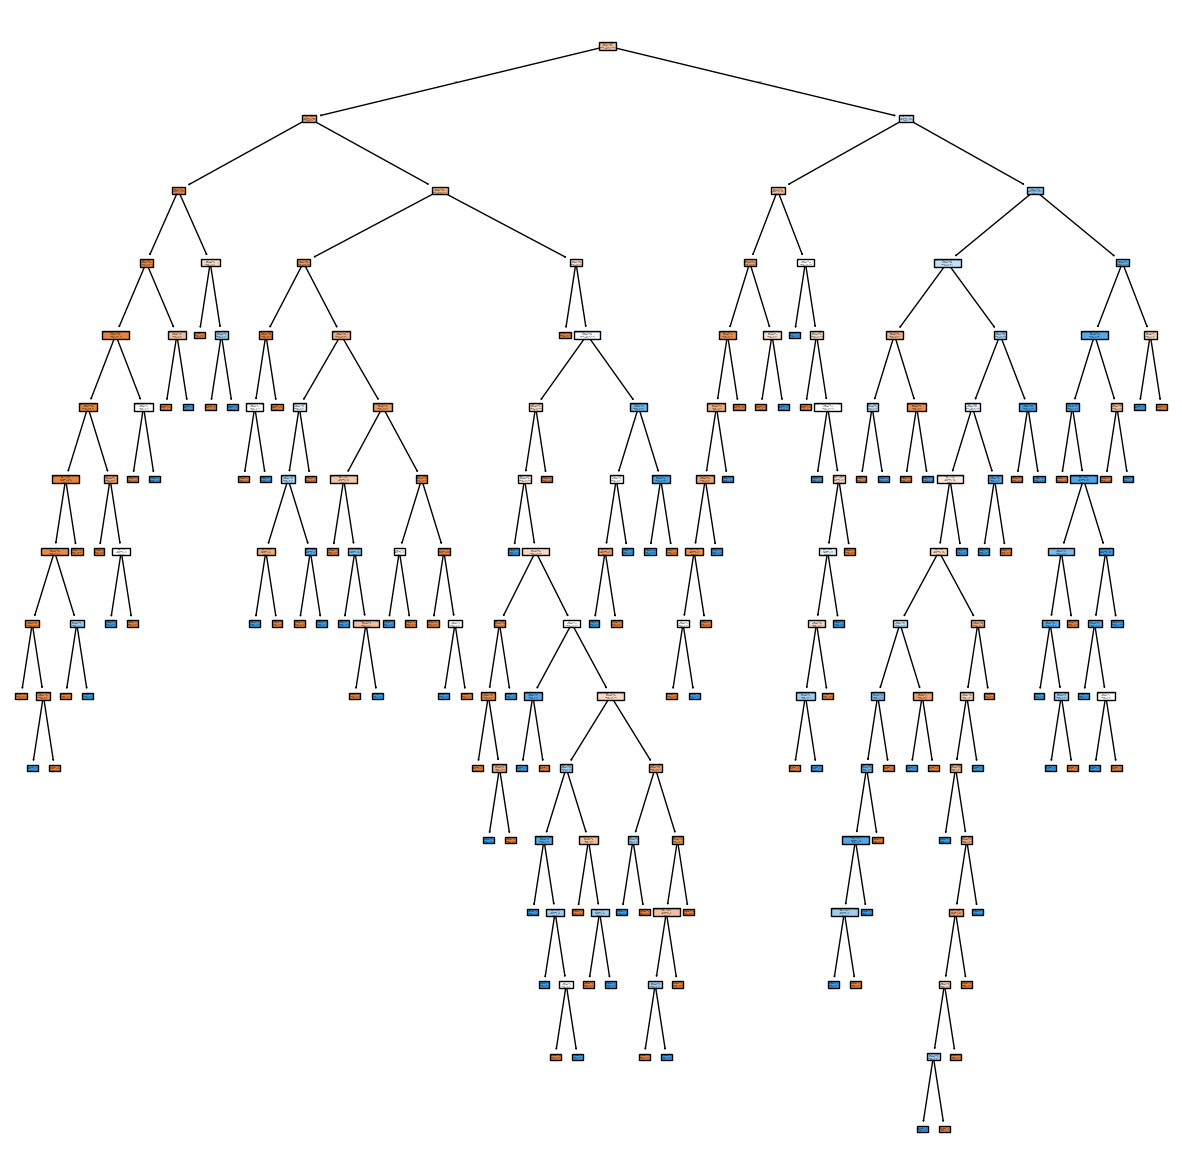

In [85]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(modelDT, feature_names = list(X_train.columns), class_names = ["0", "1","3"], filled = True)

plt.show()

In [86]:
y_pred = modelDT.predict(X_test)
y_pred

array([1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1.])

In [87]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7748344370860927

#### Modelo Optimizado

In [88]:
from sklearn.model_selection import GridSearchCV 

params = {
  "random_state" : [42],
  "max_depth" : [4,8,10,30,50],
  "min_samples_split" : [10,30,50,100],
  "min_samples_leaf" : [10,30,50,100],
  "criterion" : ["gini", "entropy","log_loss"],
  "splitter" : ["best", "random"]
}

modelDT_Opt = DecisionTreeClassifier()

clf = GridSearchCV(modelDT_Opt, params, cv=5, return_train_score=True, scoring = 'accuracy')
search = clf.fit(X_train, y_train)
results_GridSearchCV = search.cv_results_
best_params = search.best_index_

print(results_GridSearchCV['params'][best_params])

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 30, 'min_samples_split': 100, 'random_state': 42, 'splitter': 'best'}


In [89]:
modelDT = DecisionTreeClassifier(random_state = 42,criterion='entropy',max_depth = 4, min_samples_leaf=30,min_samples_split=100, splitter='best')
modelDT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=30,
                       min_samples_split=100, random_state=42)

In [90]:
y_pred = modelDT.predict(X_test)
y_pred

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.])

In [91]:
base_accuracy = accuracy_score(y_test, y_pred)
base_accuracy

0.7814569536423841

### Conclusión

Con la optimización de parámetros, el modelo de decision tree paso de 0.7748 a 0.7814, por lo que se considera que el modelo optimizado mejoró un poco.
El score de accuracy se encuentra dentro de un rango aceptable, y se recomienda usar el segundo modelo.


In [92]:
#Almacenamiento del modelo
from pickle import dump

dump(modelDT, open("/workspaces/predictingDiabetes/models/DecisionTreeOptimized.sav", "wb"))